In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
6,3,4.0,1620.0,847770.0,2011,10244.94,6037
7,3,2.0,2077.0,646760.0,1926,7924.68,6037
11,0,0.0,1200.0,5328.0,1972,91.60,6037
14,0,0.0,171.0,6920.0,1973,255.17,6037


In [4]:
zillow_train, zillow_test = train_test_split(df, test_size=.2, random_state=123)
zillow_train, zillow_validate = train_test_split(zillow_train, test_size=.3, random_state=123)

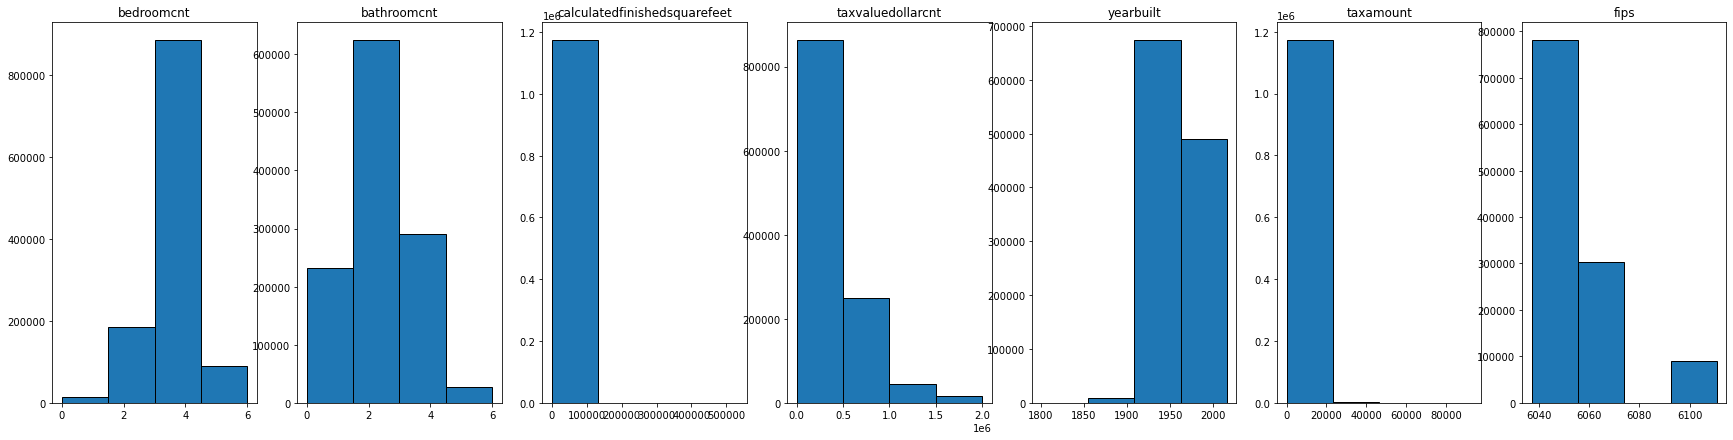

In [5]:
plt.figure(figsize=(30, 7))

for i, col in enumerate(zillow_train.columns):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1
    
    # Create subplot.
    # plt.subplot(row X col, where?)
    plt.subplot(1,7,plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    zillow_train[col].hist(bins=4, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

In [6]:
zillow_corr = zillow_train.corr(method='spearman')
zillow_corr

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
bedroomcnt,1.000000,0.624014,0.646491,0.274125,0.428576,0.275784,0.185450
bathroomcnt,0.624014,1.000000,0.816916,0.455042,0.575397,0.454756,0.194822
calculatedfinishedsquarefeet,0.646491,0.816916,1.000000,0.498040,0.514167,0.495361,0.194623
taxvaluedollarcnt,0.274125,0.455042,0.498040,1.000000,0.283346,0.977472,0.159528
yearbuilt,0.428576,0.575397,0.514167,0.283346,1.000000,0.281561,0.416403
taxamount,0.275784,0.454756,0.495361,0.977472,0.281561,1.000000,0.092225
fips,0.185450,0.194822,0.194623,0.159528,0.416403,0.092225,1.000000


In [7]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(zillow_train.bedroomcnt, zillow_train.taxvaluedollarcnt)
print(f'Correlation Coefficient by Pearson Test: {r}, p-value: {p_value}')

# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

Correlation Coefficient by Pearson Test: 0.27585479796060586, p-value: 0.0
We can reject the null hypothesis


In [8]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(zillow_train.bathroomcnt, zillow_train.taxvaluedollarcnt)
print(f'Correlation Coefficient by Pearson Test: {r}, p-value: {p_value}')

# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

Correlation Coefficient by Pearson Test: 0.5106170460870346, p-value: 0.0
We can reject the null hypothesis


In [9]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(zillow_train.fips, zillow_train.taxvaluedollarcnt)
print(f'Correlation Coefficient by Pearson Test: {r}, p-value: {p_value}')

# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

Correlation Coefficient by Pearson Test: 0.07857642435495474, p-value: 0.0
We can reject the null hypothesis


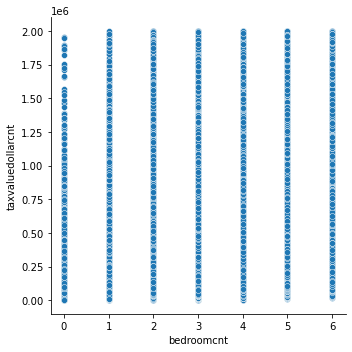

In [10]:
sns.relplot(x='bedroomcnt', y='taxvaluedollarcnt', data=zillow_train)
plt.show()

In [11]:
sns.relplot(x='bathroomcnt', y='taxvaluedollarcnt', data=zillow_train , axses.set_ylim())
plt.show()

SyntaxError: positional argument follows keyword argument (2341119416.py, line 1)

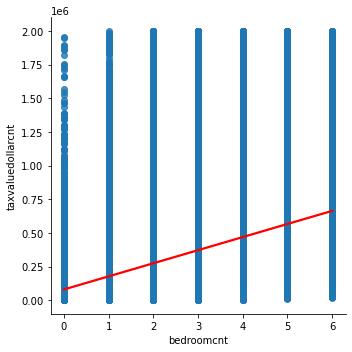

In [ ]:
# I can really pop that line color if I want.
sns.lmplot(x='bedroomcnt', y='taxvaluedollarcnt', data=zillow_train, line_kws={'color': 'red'})
plt.show()

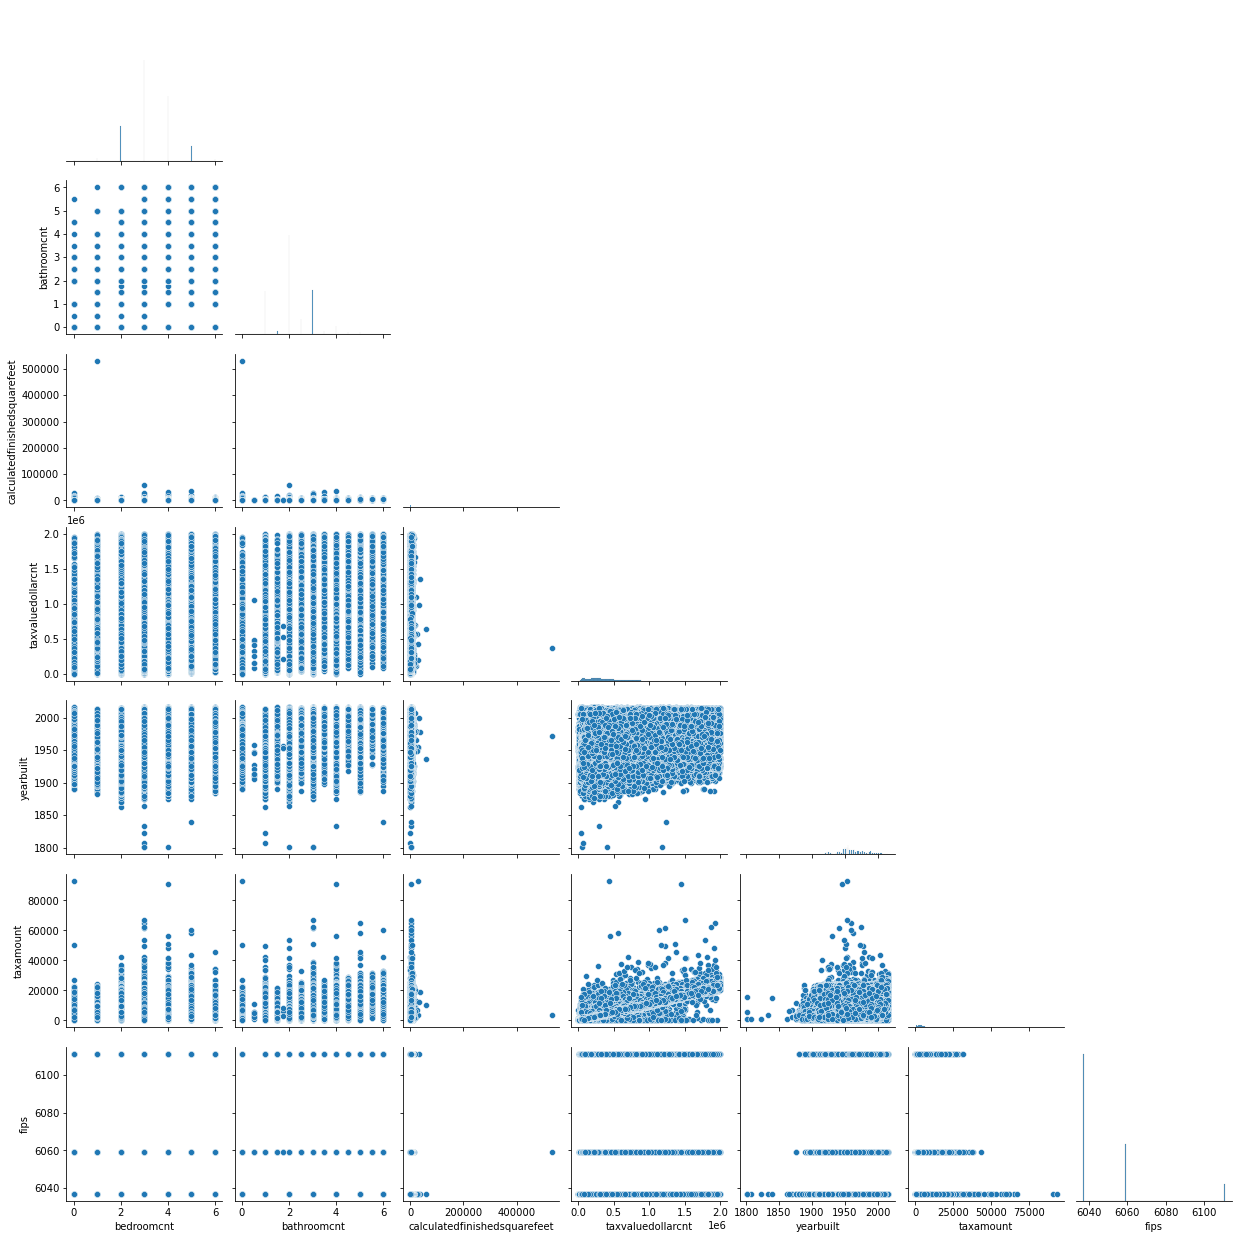

In [ ]:
sns.pairplot(zillow_train, corner=True)